In [78]:
# import
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import seaborn as sns
import platform
from matplotlib import font_manager,rc

get_ipython().run_line_magic('matplotlib','inline')
# %matplotlib inline

path = 'C:/Windows/Fonts/malgun.ttf'

if platform.system() == 'Darwin':
    rc('font',family='Arial Unicode MS')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font',family=font_name)
else:
    print('Unknown system, sorry~')

In [79]:
# 엑셀 파일을 읽어옵니다.
df = pd.read_excel('../data/imdb_final_3.xlsx', index_col=0)
df.head()

,title,english_title,year,total_season_num,runtime,genre,age_rating,age_miss,justwatch_us_age,production_country,...,season_13,season_14,season_15,season_16,season_17,director,writer,actor,imdb_title,imdb_url
0,Ojingeo Geim,Squid Game,2021,1,55,"액션, 드라마, 스릴러",19,18,TV-MA,대한민국,...,NaN,NaN,NaN,NaN,NaN,['Hwang Dong-hyuk'],['Hwang Dong-hyuk'],"['Lee Jung-jae', 'Park Hae-soo', 'Yasushi Iwak...",Squid Game (TV Series 2021),https://www.imdb.com/title/tt10919420/
1,12인의 심판자,The Twelve,2019,2,54,"드라마, 스릴러",NaN,18,TV-MA,벨기에,...,NaN,NaN,NaN,NaN,NaN,"['Kaat Beels', 'Wouter Bouvijn']","['Bert Van Dael', 'Nele Meirhaeghe', 'Roel Mon...","['Luc De Ruelle', 'Maaike Neuville', 'Tom Verm...",The Twelve (TV Series 2019–2023),https://www.imdb.com/title/tt7605396/
2,희생자 게임,The Victims' Game,2020,1,60,"드라마, 범죄, 스릴러",19,18,TV-MA,대만,...,NaN,NaN,NaN,NaN,NaN,"['David Chuang', 'Kuan-Chung Chen']","['Joyce Liu', 'Jui-Liang Hsu', 'Shih-Keng Chie...","['Wei-Ning Hsu', 'Hsiao-chuan Chang', 'Shih-Si...",The Victims' Game (TV Series 2020),https://www.imdb.com/title/tt12079212/
3,스위트 투스: 사슴뿔을 가진 소년,Sweet Tooth,2021,2,52,"SF, 드라마, 판타지, 액션",15,15,TV-14,미국,...,NaN,NaN,NaN,NaN,NaN,"['Alexis Ostrander', 'Carol Banker', 'Ciarán F...","['Beth Schwartz', 'Bo Yeon Kim', 'Carly Woodwo...","['Nonso Anozie', 'Christian Convery', 'Stefani...",Sweet Tooth (TV Series 2021),https://www.imdb.com/title/tt12809988/
4,Sweet Home,Sweet Home,2020,2,60,"스릴러, 드라마, 판타지, 공포, SF, 범죄",NaN,18,TV-MA,대한민국,...,NaN,NaN,NaN,NaN,NaN,"['Jang Young-woo', 'Lee Eung-bok', 'Park So-hy...","['Hong So-ri', 'Hwang Young-Chan', 'Kim Hyung-...","['Song Kang', 'Lee Jin-wook', 'Lee Si-young', ...",Sweet Home (TV Series 2020),https://www.imdb.com/title/tt11612120/


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 908
Data columns (total 40 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               909 non-null    object 
 1   english_title       909 non-null    object 
 2   year                909 non-null    int64  
 3   total_season_num    909 non-null    int64  
 4   runtime             909 non-null    int64  
 5   genre               909 non-null    object 
 6   age_rating          653 non-null    object 
 7   age_miss            865 non-null    object 
 8   justwatch_us_age    909 non-null    object 
 9   production_country  909 non-null    object 
 10  total_count         909 non-null    int64  
 11  total_rate          909 non-null    float64
 12  watchlist           909 non-null    int64  
 13  popularity          909 non-null    int64  
 14  user_review         909 non-null    int64  
 15  critic_review       909 non-null    int64  
 16  production   

In [81]:
# 문자열을 리스트로 변환하는 함수
def parseStringToList(string):
    if pd.isna(string):  # NaN 값인 경우 빈 리스트 반환
        return None
    # 문자열에서 각 요소를 구분하는 쉼표로 분할
    elements = string.split(', ')
    # 각 요소에서 양쪽의 작은따옴표 제거
    elements = [element.strip("['").strip("']") for element in elements]
    return elements
# 'production','distributor' 컬럼의 값을 변환
df['production'] = df['production'].apply(parseStringToList)
df['distributor'] = df['distributor'].apply(parseStringToList)

In [82]:
import ast

# 문자열을 딕셔너리로 변환하는 함수
def preprocess_data(data_str):
    try:
        data_dict = ast.literal_eval(data_str)
        if not data_dict:  # 빈 딕셔너리인 경우
            return None
        else:
            return data_dict
    except (ValueError, SyntaxError):
        return None  # 오류 발생 시 None 반환
    
# season_으로 시작하는 컬럼에 대해서만 변환 적용
for column in df.columns:
    if column.startswith('season_'):
        df[column] = df[column].apply(preprocess_data)

In [83]:
df['season_1'][0]

{'S1.E1': [8.2, 16000],
 'S1.E2': [7.5, 14000],
 'S1.E3': [8.0, 14000],
 'S1.E4': [8.4, 14000],
 'S1.E5': [7.6, 13000],
 'S1.E6': [9.2, 23000],
 'S1.E7': [7.9, 13000],
 'S1.E8': [7.8, 13000],
 'S1.E9': [7.5, 14000]}

---

In [90]:
# 시청 지속율 계산 함수
def calculate_retention_rate(season_data):
    episode_views = [ep[1] for ep in season_data.values() if isinstance(ep, (list, tuple))]
    if len(episode_views) > 1:
        initial_viewers = episode_views[0]
        final_viewers = episode_views[-1]
        retention_rate = (final_viewers / initial_viewers) * 100
    else:
        retention_rate = 100  # If there's only one episode, retention is 100%
    return retention_rate

# 시즌 1의 시청 지속율 계산
df['s1_retention_rate'] = df['season_1'].apply(calculate_retention_rate)

# PCA를 위한 데이터 준비
metrics_df = pd.DataFrame()
metrics_df['watchlist'] = df['watchlist']
metrics_df['total_rate'] = df['total_rate']
metrics_df['total_count'] = df['total_count']
metrics_df['popularity'] = df['popularity']
metrics_df['user_review'] = df['user_review']
metrics_df['critic_review'] = df['critic_review']
metrics_df['s1_retention_rate'] = df['s1_retention_rate']

# PCA 적용
pca = PCA(n_components=1)
principal_components = pca.fit_transform(metrics_df)

# PCA에서 추출한 주성분 가중치
pca_weights = pca.components_[0]

# 가중치 딕셔너리
weights = {
    'watchlist': pca_weights[metrics_df.columns.get_loc('watchlist')],
    'total_rate': pca_weights[metrics_df.columns.get_loc('total_rate')],
    'total_count': pca_weights[metrics_df.columns.get_loc('total_count')],
    'popularity': pca_weights[metrics_df.columns.get_loc('popularity')],
    'user_review_count': pca_weights[metrics_df.columns.get_loc('user_review')],
    'critic_review_count': pca_weights[metrics_df.columns.get_loc('critic_review')],
    'retention_rate': pca_weights[metrics_df.columns.get_loc('s1_retention_rate')]
}
print(weights)

{'watchlist': 0.6449522522424067, 'total_rate': 1.797354836532581e-06, 'total_count': 0.7642181592443402, 'popularity': -0.0010346973701373058, 'user_review_count': 0.002469427034195453, 'critic_review_count': 0.00016886388723785165, 'retention_rate': 1.4895348523812263e-05}


## PCA가 구해준 가중치
- 'watchlist': 0.6449522522424068,
- 'total_rate': 1.7973548365325807e-06, 
- 'total_count': 0.7642181592443401,
- 'popularity': -0.001034697370137305,
- 'user_review': 0.002469427034195454,
- 'critic_review': 0.00016886388723785147,
- 'retention_rate': 1.4895348523812255e-05

In [94]:
# 흥행지표 계산 함수 수정
def calculate_success_metric(row, weights):
    user_review_count = row['user_review']
    critic_review_count = row['critic_review']
    
    season_weighted_avg = row['s1_retention_rate']  # 시즌 평점 평균을 사용할 경우 올바르게 정의 필요
    average_retention_rate = row['s1_retention_rate']  # 평균 시청 지속율을 사용할 경우 올바르게 정의 필요
    
    # 종합 흥행지표 계산
    metric = (
        weights['watchlist'] * row['watchlist'] +
        weights['total_rate'] * row['total_rate'] +
        weights['total_count'] * row['total_count'] +
        weights['popularity'] * row['popularity'] +
        weights['user_review_count'] * np.log(user_review_count + 1) +
        weights['critic_review_count'] * np.log(critic_review_count + 1) +
        weights['retention_rate'] * average_retention_rate
    )
    return metric

# 흥행지표 계산 및 결과 출력
df['success_metric'] = df.apply(lambda row: calculate_success_metric(row, weights), axis=1)
print(df[['title', 'success_metric']])

                       title  success_metric
0               Ojingeo Geim   580793.608793
1                   12인의 심판자    11285.344976
2                     희생자 게임     2806.423612
3         스위트 투스: 사슴뿔을 가진 소년   114527.179315
4                 Sweet Home    52951.190645
..                       ...             ...
904                      레일라     8590.636726
905              100만 엔의 여인들     2765.780503
906                  킬러 코미디언     2139.825210
907                       달러      497.515717
908  엘리트들, 못다 한 이야기: 나디아 구스만     2507.797788

[909 rows x 2 columns]


In [97]:
# success_metric을 기준으로 내림차순 정렬
sorted_df = df.sort_values(by='success_metric', ascending=False)

# 상위 30개 작품 출력
top_30 = sorted_df[['title', 'total_season_num', 'success_metric']].head(30)

# 결과 출력
print(top_30)

                                 title  total_season_num  success_metric
17                             브레이킹 배드                 5    2.434584e+06
24                             기묘한 이야기                 4    1.648110e+06
7                                워킹 데드                11    1.472693e+06
27                            피키 블라인더스                 6    1.011604e+06
54                                 덱스터                 8    9.591276e+05
19                                바이킹스                 7    9.387597e+05
46                               블랙 미러                 6    9.371735e+05
42                             베터 콜 사울                 6    8.617361e+05
31                                  위쳐                 3    7.611373e+05
60                           하우스 오브 카드                 6    7.556022e+05
12                               Suits                 9    7.044925e+05
51   La casa de papel - Netflix series                 5    6.998492e+05
85                                나르코스             

---

# season_1 에피소드 없이 PCA

In [62]:
# 시즌 데이터를 변환하고 평균을 계산하는 함수
def process_seasons(df, start_season=1, end_season=17):
    for season_num in range(start_season, end_season + 1):
        season_col = f'season_{season_num}'
        avg_rating_col = f's{season_num}_avg_rating'
        avg_views_col = f's{season_num}_avg_views'
        
        # 평균 계산
        def calculate_avg(season_data):
            if season_data:
                avg_rating = sum([float(ep[0]) for ep in season_data.values()]) / len(season_data)
                avg_views = sum([int(ep[1]) for ep in season_data.values()]) / len(season_data)
                return avg_rating, avg_views
            else:
                return None, None

        df[[avg_rating_col, avg_views_col]] = df.apply(
            lambda row: calculate_avg(row[season_col]) if row[season_col] is not None else (None, None),
            axis=1, result_type='expand'
        )

# 이미 데이터를 읽어왔으므로 바로 시즌 데이터를 처리합니다.
process_seasons(df)

# 평균 평점 및 조회 수를 포함한 데이터프레임 생성
metrics_df = pd.DataFrame()
metrics_df['watchlist'] = df['watchlist']
metrics_df['total_rate'] = df['total_rate']
metrics_df['total_count'] = df['total_count']
metrics_df['popularity'] = df['popularity']
metrics_df['user_review'] = df['user_review']
metrics_df['critic_review'] = df['critic_review']

for season_num in range(1, 18):
    avg_rating_col = f's{season_num}_avg_rating'
    avg_views_col = f's{season_num}_avg_views'
    metrics_df[avg_rating_col] = df[avg_rating_col]
    metrics_df[avg_views_col] = df[avg_views_col]

# 결측값을 0으로 대체
metrics_df.fillna(0, inplace=True)

# PCA 적용
pca = PCA(n_components=1)
principal_components = pca.fit_transform(metrics_df)

# PCA에서 추출한 주성분 가중치
pca_weights = pca.components_[0]

# 가중치와 각 지표를 곱하여 흥행지표 계산
metrics_df['success_metric'] = np.dot(metrics_df, pca_weights)
metrics_df['title'] = df['title']
metrics_df['total_season_num'] = df['total_season_num']


In [63]:
# success_metric을 기준으로 내림차순 정렬
sorted_df = metrics_df.sort_values(by='success_metric', ascending=False)

# 상위 30개 작품 출력
top_30 = sorted_df[['title', 'total_season_num', 'success_metric']].head(30)

# 결과 출력
print(top_30)

                                 title  total_season_num  success_metric
17                             브레이킹 배드                 5    2.435732e+06
24                             기묘한 이야기                 4    1.648671e+06
7                                워킹 데드                11    1.473217e+06
27                            피키 블라인더스                 6    1.011855e+06
54                                 덱스터                 8    9.591807e+05
46                               블랙 미러                 6    9.402061e+05
19                                바이킹스                 7    9.387810e+05
42                             베터 콜 사울                 6    8.624907e+05
31                                  위쳐                 3    7.614128e+05
60                           하우스 오브 카드                 6    7.556218e+05
12                               Suits                 9    7.044364e+05
51   La casa de papel - Netflix series                 5    7.000288e+05
85                                나르코스             

# 시즌별 시청 지속율 (Retention Rate)을 구해 PCA계산에도 추가

In [64]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA


# 시즌 데이터를 변환하고 평균을 계산하는 함수
def process_seasons(df, start_season=1, end_season=17):
    for season_num in range(start_season, end_season + 1):
        season_col = f'season_{season_num}'
        avg_rating_col = f's{season_num}_avg_rating'
        avg_views_col = f's{season_num}_avg_views'
        
        def calculate_avg(season_data):
            if season_data:
                avg_rating = sum([float(ep[0]) for ep in season_data.values()]) / len(season_data)
                avg_views = sum([int(ep[1]) for ep in season_data.values()]) / len(season_data)
                return avg_rating, avg_views
            else:
                return None, None

        df[[avg_rating_col, avg_views_col]] = df.apply(
            lambda row: calculate_avg(row[season_col]) if row[season_col] is not None else (None, None),
            axis=1, result_type='expand'
        )

# 시즌 데이터 처리
process_seasons(df)

# 결측값을 0으로 대체
df.fillna(0, inplace=True)

# PCA를 위한 데이터 준비
metrics_df = pd.DataFrame()
metrics_df['watchlist'] = df['watchlist']
metrics_df['total_rate'] = df['total_rate']
metrics_df['total_count'] = df['total_count']
metrics_df['popularity'] = df['popularity']
metrics_df['user_review'] = df['user_review']
metrics_df['critic_review'] = df['critic_review']

for season_num in range(1, 18):
    avg_rating_col = f's{season_num}_avg_rating'
    avg_views_col = f's{season_num}_avg_views'
    metrics_df[avg_rating_col] = df[avg_rating_col]
    metrics_df[avg_views_col] = df[avg_views_col]

# PCA 적용
pca = PCA(n_components=1)
principal_components = pca.fit_transform(metrics_df)

# PCA에서 추출한 주성분 가중치
pca_weights = pca.components_[0]

# 가중치 딕셔너리
weights = {
    'watchlist': pca_weights[metrics_df.columns.get_loc('watchlist')],
    'total_rate': pca_weights[metrics_df.columns.get_loc('total_rate')],
    'total_count': pca_weights[metrics_df.columns.get_loc('total_count')],
    'popularity': pca_weights[metrics_df.columns.get_loc('popularity')],
    'user_review_count': pca_weights[metrics_df.columns.get_loc('user_review')],
    'critic_review_count': pca_weights[metrics_df.columns.get_loc('critic_review')],
    'season_ratings': sum(pca_weights[metrics_df.columns.get_loc(f's{season_num}_avg_rating')] for season_num in range(1, 18)),
    'retention_rate': sum(pca_weights[metrics_df.columns.get_loc(f's{season_num}_avg_views')] for season_num in range(1, 18))
}

# 시청 지속율 계산 함수
def calculate_retention_rate(season_episode_counts):
    retention_rates = []
    for episode_counts in season_episode_counts:
        if len(episode_counts) > 1:
            initial_viewers = episode_counts[0]
            final_viewers = episode_counts[-1]
            retention_rate = (final_viewers / initial_viewers) * 100
            retention_rates.append(retention_rate)
        else:
            retention_rates.append(100)  # If there's only one episode, retention is 100%
    return retention_rates


In [65]:
# 흥행지표 계산 함수
def calculate_success_metric(row, weights):
    total_season_num = int(row['total_season_num'])
    all_episode_viewer_counts = []

    for season_num in range(1, total_season_num + 1):
        season_data = row[f'season_{season_num}']
        
        if not isinstance(season_data, dict):
            # Handle cases where season_data is not as expected (e.g., None or unexpected type)
            season_data = {}

        episode_viewer_counts = [episode[1] for episode in season_data.values() if isinstance(episode, tuple)]
        all_episode_viewer_counts.append(episode_viewer_counts)
        
        # 시즌별 평점 평균 계산
        season_ratings = [episode[0] for episode in season_data.values() if isinstance(episode, tuple)]
        season_counts = [episode[1] for episode in season_data.values() if isinstance(episode, tuple)]
        
        if season_counts:
            season_weighted_avg = np.sum(np.array(season_ratings) * np.array(season_counts)) / np.sum(season_counts)
        else:
            season_weighted_avg = 0  # Handle division by zero or empty season_counts
        
        row[f's{season_num}_avg_rating'] = season_weighted_avg

    # 시청 지속율 계산
    retention_rate = calculate_retention_rate(all_episode_viewer_counts)
    average_retention_rate = np.mean(retention_rate)
    
    # 로그 변환을 통한 데이터 정규화
    user_review_count = row['user_review']
    critic_review_count = row['critic_review']
    
    # 종합 흥행지표 계산
    metric = (
        weights['watchlist'] * row['watchlist'] +
        weights['total_rate'] * row['total_rate'] +
        weights['total_count'] * row['total_count'] +
        weights['popularity'] * row['popularity'] +
        weights['user_review_count'] * np.log(user_review_count + 1) +
        weights['critic_review_count'] * np.log(critic_review_count + 1) +
        weights['season_ratings'] * season_weighted_avg +
        weights['retention_rate'] * average_retention_rate
    )
    return metric

# 모든 행에 대해 흥행지표 계산
df['success_metric'] = df.apply(lambda row: calculate_success_metric(row, weights), axis=1)

# 결과 출력
print(df[['title', 'success_metric']])

                       title  success_metric
0               Ojingeo Geim   580584.597087
1                   12인의 심판자    11287.914167
2                     희생자 게임     2812.183404
3         스위트 투스: 사슴뿔을 가진 소년   114490.961594
4                 Sweet Home    52938.126141
..                       ...             ...
904                      레일라     8594.269901
905              100만 엔의 여인들     2771.559156
906                  킬러 코미디언     2145.850988
907                       달러      504.144693
908  엘리트들, 못다 한 이야기: 나디아 구스만     2513.674063

[909 rows x 2 columns]


In [68]:
# success_metric을 기준으로 오름차순 정렬(하위30위)
sorted_df = df.sort_values(by='success_metric', ascending=True)

# 하위 30개 작품 출력
top_30 = sorted_df[['title', 'success_metric']].head(30)

# 결과 출력
print(top_30)


                      title  success_metric
827  사랑, 인생, 그리고 그 사이의 모든 것      114.531947
830                    #노필터      129.809436
822                The Cage      137.450522
816                    파나티코      157.311571
229              앗! 크리스마스라니      166.481403
684                  타임 허슬러      173.355364
620                 페르마의 요리      177.938206
787                    매버릭스      177.940243
793                    괴기특급      180.232728
803                  새비지 리듬      189.398265
367                인생은 오답노트      192.454395
902                죽음의 타임캡슐      212.314679
689                  여름의 비밀      221.481255
786        체조 아카데미: 두 번째 기회      224.536861
591                  겨우, 서른      229.885951
121                   컨트리 퀸      231.416435
804        겟 이븐: 우리는 치어 스쿼드      241.343569
164         셰프 치코의 빈자리를 채워라      252.043976
703                 에린 & 에런      253.369197
616                    자이바!      255.862646
759     Jingkeuseuui Yeonin      286.418700
824                코요테 스카우트     

In [69]:
# success_metric을 기준으로 내림차순 정렬
sorted_df = df.sort_values(by='success_metric', ascending=False)

# 상위 30개 작품 출력
top_30 = sorted_df[['title', 'success_metric']].head(30)

# 결과 출력
print(top_30)

                                 title  success_metric
17                             브레이킹 배드    2.433685e+06
24                             기묘한 이야기    1.647501e+06
7                                워킹 데드    1.472149e+06
27                            피키 블라인더스    1.011231e+06
54                                 덱스터    9.587765e+05
19                                바이킹스    9.384142e+05
46                               블랙 미러    9.368292e+05
42                             베터 콜 사울    8.614208e+05
31                                  위쳐    7.608595e+05
60                           하우스 오브 카드    7.553261e+05
12                               Suits    7.042354e+05
51   La casa de papel - Netflix series    6.995945e+05
85                                나르코스    6.708076e+05
13                                  다크    6.653673e+05
43                               퀸스 갬빗    6.606694e+05
28                                 하우스    6.414784e+05
9                            The Flash    6.171464e+05
0         

# 상광계수를 이용한 가중치는 어떻게 넣어야 되지?

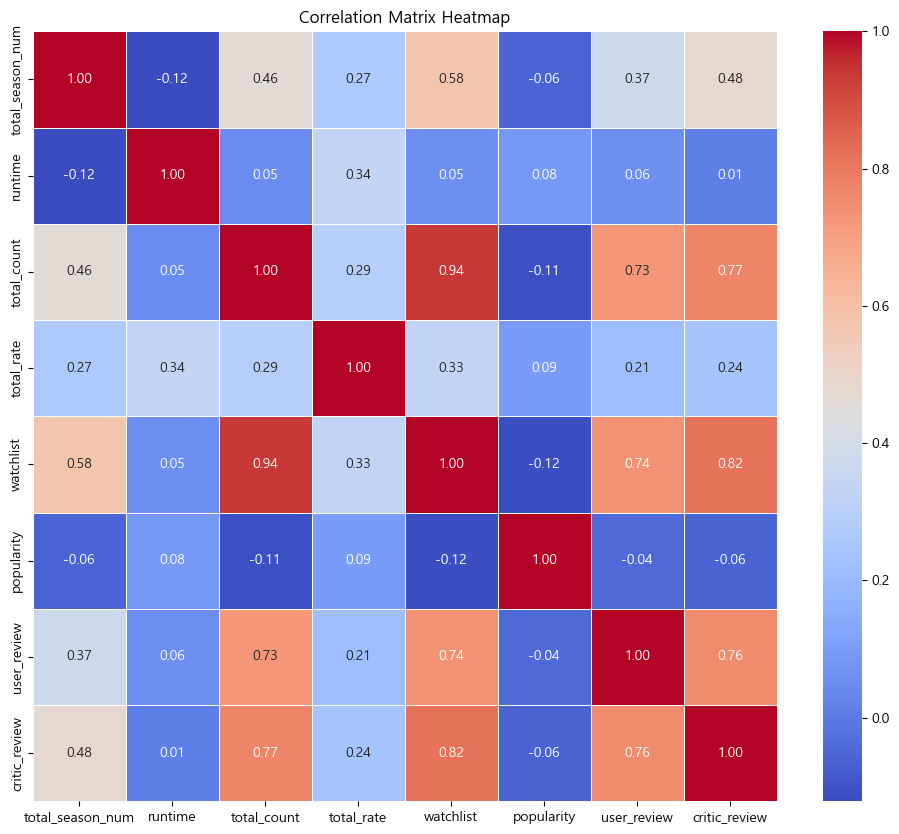

In [70]:
numeric_columns = ['total_season_num', 'runtime', 'total_count', 'total_rate', 
                   'watchlist', 'popularity', 'user_review', 'critic_review']
numeric_df = df[numeric_columns]

# 상관 행렬 계산
correlation_matrix = numeric_df.corr()

# Heatmap 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

---

# 시즌1

In [71]:
# PCA를 위한 데이터 준비
metrics_df = pd.DataFrame()
metrics_df['watchlist'] = df['watchlist']
metrics_df['total_rate'] = df['total_rate']
metrics_df['total_count'] = df['total_count']
metrics_df['popularity'] = df['popularity']
metrics_df['user_review'] = df['user_review']
metrics_df['critic_review'] = df['critic_review']
metrics_df['s1_avg_rating'] = df['s1_avg_rating']
metrics_df['s1_avg_views'] = df['s1_avg_views']

# PCA 적용
pca = PCA(n_components=1)
principal_components = pca.fit_transform(metrics_df)

# PCA에서 추출한 주성분 가중치
pca_weights = pca.components_[0]

# 가중치 딕셔너리
weights = {
    'watchlist': pca_weights[metrics_df.columns.get_loc('watchlist')],
    'total_rate': pca_weights[metrics_df.columns.get_loc('total_rate')],
    'total_count': pca_weights[metrics_df.columns.get_loc('total_count')],
    'popularity': pca_weights[metrics_df.columns.get_loc('popularity')],
    'user_review_count': pca_weights[metrics_df.columns.get_loc('user_review')],
    'critic_review_count': pca_weights[metrics_df.columns.get_loc('critic_review')],
    'season_1_ratings': pca_weights[metrics_df.columns.get_loc('s1_avg_rating')],
    'season_1_views': pca_weights[metrics_df.columns.get_loc('s1_avg_views')]
}


In [72]:
def calculate_success_metric(row, weights):
    success_metric = (
        weights['watchlist'] * row['watchlist'] +
        weights['total_rate'] * row['total_rate'] +
        weights['total_count'] * row['total_count'] +
        weights['popularity'] * row['popularity'] +
        weights['user_review_count'] * row['user_review'] +
        weights['critic_review_count'] * row['critic_review'] +
        weights['season_1_ratings'] * row['s1_avg_rating'] +
        weights['season_1_views'] * row['s1_avg_views']
    )
    return success_metric

# 모든 행에 대해 흥행 지표 계산
df['success_metric'] = df.apply(lambda row: calculate_success_metric(row, weights), axis=1)

# 결과 출력
print(df[['title', 'success_metric']])


                       title  success_metric
0               Ojingeo Geim   580960.679049
1                   12인의 심판자    11287.036719
2                     희생자 게임     2806.977450
3         스위트 투스: 사슴뿔을 가진 소년   114545.214285
4                 Sweet Home    52959.242206
..                       ...             ...
904                      레일라     8595.367998
905              100만 엔의 여인들     2766.226236
906                  킬러 코미디언     2140.682164
907                       달러      497.993168
908  엘리트들, 못다 한 이야기: 나디아 구스만     2510.932453

[909 rows x 2 columns]


In [73]:
# success_metric을 기준으로 내림차순 정렬
sorted_df = df.sort_values(by='success_metric', ascending=False)

# 상위 30개 작품 출력
top_30 = sorted_df[['title', 'success_metric']].head(30)

# 결과 출력
print(top_30)

                                 title  success_metric
17                             브레이킹 배드    2.434815e+06
24                             기묘한 이야기    1.648296e+06
7                                워킹 데드    1.472825e+06
27                            피키 블라인더스    1.011664e+06
54                                 덱스터    9.591369e+05
19                                바이킹스    9.387607e+05
46                               블랙 미러    9.380480e+05
42                             베터 콜 사울    8.619370e+05
31                                  위쳐    7.613850e+05
60                           하우스 오브 카드    7.556038e+05
12                               Suits    7.044696e+05
51   La casa de papel - Netflix series    6.998914e+05
85                                나르코스    6.710772e+05
13                                  다크    6.657493e+05
43                               퀸스 갬빗    6.610083e+05
28                                 하우스    6.417007e+05
9                            The Flash    6.174154e+05
0         

---

# 시즌2

In [74]:
df = df[df['total_season_num'] >= 2]

In [75]:
# PCA를 위한 데이터 준비
metrics_df = pd.DataFrame()
metrics_df['watchlist'] = df['watchlist']
metrics_df['total_rate'] = df['total_rate']
metrics_df['total_count'] = df['total_count']
metrics_df['popularity'] = df['popularity']
metrics_df['user_review'] = df['user_review']
metrics_df['critic_review'] = df['critic_review']
metrics_df['s2_avg_rating'] = df['s2_avg_rating']
metrics_df['s2_avg_views'] = df['s2_avg_views']

# PCA 적용
pca = PCA(n_components=1)
principal_components = pca.fit_transform(metrics_df)

# PCA에서 추출한 주성분 가중치
pca_weights = pca.components_[0]

# 가중치 딕셔너리
weights = {
    'watchlist': pca_weights[metrics_df.columns.get_loc('watchlist')],
    'total_rate': pca_weights[metrics_df.columns.get_loc('total_rate')],
    'total_count': pca_weights[metrics_df.columns.get_loc('total_count')],
    'popularity': pca_weights[metrics_df.columns.get_loc('popularity')],
    'user_review_count': pca_weights[metrics_df.columns.get_loc('user_review')],
    'critic_review_count': pca_weights[metrics_df.columns.get_loc('critic_review')],
    'season_2_ratings': pca_weights[metrics_df.columns.get_loc('s2_avg_rating')],
    'season_2_views': pca_weights[metrics_df.columns.get_loc('s2_avg_views')]
}

In [76]:
def calculate_success_metric(row, weights):
    success_metric = (
        weights['watchlist'] * row['watchlist'] +
        weights['total_rate'] * row['total_rate'] +
        weights['total_count'] * row['total_count'] +
        weights['popularity'] * row['popularity'] +
        weights['user_review_count'] * row['user_review'] +
        weights['critic_review_count'] * row['critic_review'] +
        weights['season_2_ratings'] * row['s2_avg_rating'] +
        weights['season_2_views'] * row['s2_avg_views']
    )
    return success_metric

# 모든 행에 대해 흥행 지표 계산
df['success_metric'] = df.apply(lambda row: calculate_success_metric(row, weights), axis=1)

# 결과 출력
print(df[['title', 'success_metric']])

                  title  success_metric
1              12인의 심판자    1.124035e+04
3    스위트 투스: 사슴뿔을 가진 소년    1.141256e+05
4            Sweet Home    5.279719e+04
6                  굿 닥터    2.229596e+05
7                 워킹 데드    1.472138e+06
..                  ...             ...
872               꽃들의 집    1.362305e+04
873          우리가 몰랐던 그녀    7.878958e+03
885          악플러는 꺼져주세요    9.532879e+03
886            거짓말의 거짓말    2.315656e+03
888               헨테파이드    5.252508e+03

[278 rows x 2 columns]


In [77]:
# success_metric을 기준으로 내림차순 정렬
sorted_df = df.sort_values(by='success_metric', ascending=False)

# 상위 30개 작품 출력
top_30 = sorted_df[['title', 'success_metric']].head(30)

# 결과 출력
print(top_30)

                                 title  success_metric
17                             브레이킹 배드    2.441383e+06
24                             기묘한 이야기    1.648947e+06
7                                워킹 데드    1.472138e+06
27                            피키 블라인더스    1.009226e+06
54                                 덱스터    9.598762e+05
46                               블랙 미러    9.362590e+05
19                                바이킹스    9.360590e+05
42                             베터 콜 사울    8.616967e+05
31                                  위쳐    7.610165e+05
60                           하우스 오브 카드    7.546497e+05
12                               Suits    7.033034e+05
51   La casa de papel - Netflix series    6.998571e+05
85                                나르코스    6.702108e+05
13                                  다크    6.644817e+05
28                                 하우스    6.422284e+05
9                            The Flash    6.152691e+05
50                                 루시퍼    5.496255e+05
26        

# 장르별로 묶어서 PCA

# 군집화를 해보고 PCA

# 연도별로 묶어서 PCA